# Модуль 2: Основы нейронных сетей

## Теория

### Основные понятия
Что такое нейрон, слой, активация?

Определения:
1. Нейрон - это вычислительная единица, которая получает информацию, производит над ней простые вычисления и передает ее дальше. У каждого нейрона есть 2 параметра: входные данные (input data), выходные данные (output data). Типы нейронов: входной нейрон (input = output), скрытый нейрон - нейрон на промежуточном слое между входными и выходными нейронами (input data = суммарная информация всех нейронов с предыдущего слоя).
2. Слой - нейросеть состоит из большого количества нейронов. Нейроны одного типа объединяются в группу. Это и называется слоем.
3. Активация (функция активации) - функция преобразовывает линейную зависимость во входных данных в нелинейную. Это ее главная задача. Поскольку на линейной зависимости сеть не обучится. Вот ее формула: $activation_func(sum(weight * inputs + bias))$. Популярные функции активации: 
 - ReLU - $E(f) = [0, \infty)$ - уменьшение проблемы исчезающего градиента;
 - Sigmoid - $E(f) = [0, 1]$ - бинарная классификация;
 - Softmax - принимает список произвольных чисел и преобразует их в список вероятностей пропорциональных этим числам. Например, на вход подается список [1, 2, 3]. Тогда: $softmax([1, 2, 3]) = [0.09, 0.244, 0.665]$ - многоклассовая классификация;
 - Tanh - $E(f) = [-1, 1]$ - выходные значения tanh находятся в диапазоне от -1 до 1, что делает ее центрированной относительно нуля. Это выгодно, поскольку это может помочь процессу обучения, так как данные, проходящие через сеть, в среднем будут поддерживать среднее значение близкое к 0, что в свою очередь помогает оптимизации методом градиентного спуска. tanh часто используется в скрытых слоях.
 - Binary Step Function (ступенчатая) - первая использованная функция активации в контексте нейронных сетей. В наше время функция не часто используется в современных нейронных сетях, потому что она не дифференцируема на пороге $\theta$, что делает ее непригодной для использования с обратным распространением ошибки (методом, используемым для обучения нейронных сетей).
 $$
 f(x)=
 \begin{cases}
 0 & \quad \text{if $x < \theta$}\\ 
 1 & \quad \text{if $x \geq \theta$}
 \end{cases}
 $$

### Определение процессов

1. Обучение: Процесс настройки весов нейронной сети с использованием алгоритма обратного распространения ошибки (backpropagation) и оптимизации.
2. Переобучение (overfitting): Ситуация, когда модель слишком хорошо подстраивается под обучающие данные и плохо работает на новых данных.

### Важные определения для обучения модели

1. Функция потерь (Loss Function) - это математическая функция, которая измеряет, насколько хорошо модель предсказывает целевые значения. Она вычисляет разницу между предсказанными значениями моделью и фактическими значениями целевых переменных. Примеры:
 - Mean Squared Error (MSE): Используется для регрессионных задач, вычисляет среднюю квадратную ошибку между предсказанными и фактическими значениями.
- Cross-Entropy Loss: Используется для задач классификации, измеряет несоответствие между предсказанным вероятностным распределением и истинным распределением.

2. Оптимизатор — это алгоритм, который обновляет веса нейронной сети на основе градиента функции потерь. Он помогает находить минимальные значения функции потерь, которые означают хорошее предсказание моделью. Примеры оптимизаторов:
- Stochastic Gradient Descent (SGD): Обновляет веса, основываясь на одном или нескольких примерах из обучающего набора данных.
- Adam (Adaptive Moment Estimation): Комбинирует преимущества двух других методов: адаптивной скорости обучения и использование момента. Обычно работает лучше, особенно с глубокими сетями.

### Процесс обучения модели нейросети

Цель: подобрать веса модели, при которых функция потерь будет минимальной!
  
Итерация обучения модели состоит из шагов:
1. Прямое распространение (Forward Pass): Входные данные передаются через нейронную сеть, где каждый слой обрабатывает данные до тех пор, пока не будет получен финальный выход.
2. Вычисление функции потерь: После прямого распространения рассчитывается значение функции потерь, которое показывает, насколько хорошо модель справляется с этой задачей.
3. Обратное распространение (Backward Pass): Процесс, в котором вычисляются градиенты функции потерь по отношению к весам модели. Это позволяет понять, как изменять веса, чтобы уменьшить ошибку.
4. Обновление весов: Оптимизатор использует градиенты, чтобы обновить веса модели. Это повторяется многократно, пока не будет достигнуто приемлемое значение функции потерь.

## Задачи

In [9]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.metrics import precision_score, recall_score, f1_score

from typing import Dict

In [2]:
# Указание в качестве девайса GPU если доступна
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [3]:
# Загрузка данных
train_data = datasets.MNIST(
    root="../data",
    train=True,
    download=True,
    transform=ToTensor())

test_data = datasets.MNIST(
    root="../data",
    train=False,
    download=True,
    transform=ToTensor())


In [4]:
# Создание DataLoaders
train_dataloader = DataLoader(
    train_data,
    batch_size=16,
    shuffle=True)

test_dataloader = DataLoader(
    test_data,
    batch_size=16,
    shuffle=True)


### Первая нейронная сеть:
Реализовать простую полносвязную нейронную сеть для задачи классификации MNIST. Использовать один скрытый слой и функцию активации ReLU.

<function matplotlib.pyplot.show(close=None, block=None)>

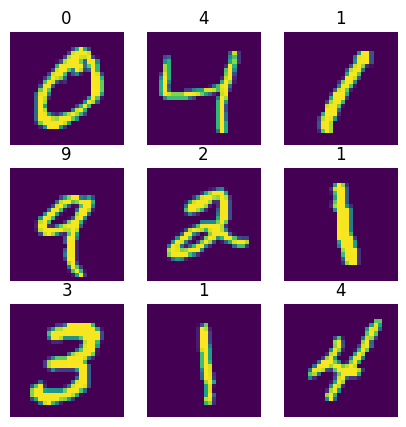

In [4]:
# Визуализация данных
figure = plt.figure(figsize=(5, 5))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    img, label = train_data[i]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze())

plt.show

Feature batch shape: torch.Size([16, 1, 28, 28])
Labels batch shape: torch.Size([16])


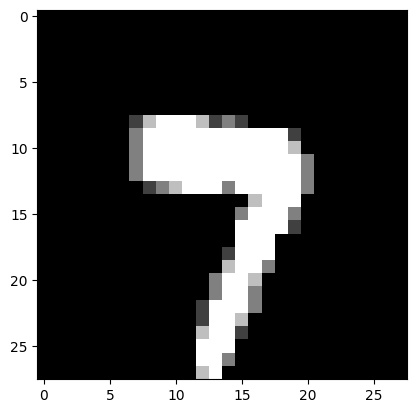

Label: 7


In [6]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [7]:
# Создание модели нейросети
# FCNN (Fully Connected Neural Network) - Полносвязная нейронная сеть (она же MLP - Многослойный перцептрон)
class NeuralNetwork(nn.Module):
    def __init__(self, n_classes):
        super().__init__()

        # Входной слой - перевод из 2D массива в 1D
        self.input_layer = nn.Flatten()
        # Скрытые слои
        self.hidden_1 = nn.Linear(28*28, 512) # Скрытый слой №1
        # Функция активации - переводит линейную связь в нелинейную
        self.activation_func_1 = nn.ReLU()
        
        self.hidden_2 = nn.Linear(512, 512) # Скрытый слой №2
        # Функция активации - переводит линейную связь в нелинейную
        self.activation_func_2 = nn.ReLU()

        # Выходной слой
        self.output_layer = nn.Linear(512, n_classes) # На выходе кол-во классов
        
        # Для удобства собираем все в один контейнер последовательный
        # Это сокращает и улучшает читаемость кода
        self.sequential_container = nn.Sequential(
            self.hidden_1,
            self.activation_func_1,
            self.hidden_2,
            self.activation_func_2,
            self.output_layer
        )

    def forward(self, x):
        # Изображение 2D проходит через входной слой, где преобразовывается в 1D массив
        x = self.input_layer(x)
        # Проход 1D вектора изображения через все слои нейросети
        # На выходе получаем логиты (кол-во логитов = кол-во классов)
        logits = self.sequential_container(x)

        return logits
    

In [11]:
# Создание объекта нейросети
model = NeuralNetwork(10).to(device=device) # сразу переводим модель на GPU
# Определение функции потерь
criterion = nn.CrossEntropyLoss()
# Выбор оптимизатора
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Обучение нейросети
model.train() # Перевод модели в стадию обучения

for epoch in tqdm(range(5)): # Обучение длится 5 эпох
    for data, target in train_dataloader:
        data = data.to(device) # Перенос всех данных на GPU
        target = target.to(device) # Перенос всех данных на GPU
        optimizer.zero_grad() # Обнуляем градиенты
        output = model(data) # Прямое распространение (данные проходят через все слои)
        loss = criterion(output, target) # Вычисление функции потерь
        loss.backward() # Обратное распространение
        optimizer.step()

print("Обучение завершено!")

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:49<00:00,  9.97s/it]

Обучение завершено!


In [ ]:
# Расширение выходной информации об обучении модели
# + визуализация обучения модели
model = NeuralNetwork(10) # Определение модели

criterion = nn.CrossEntropyLoss() # Функция потерь для классификации
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


model.train()
all_losses = []
num_epochs = 5
for epoch in range(num_epochs):
    total_loss = 0
    for data, targets in train_dataloader:
        optimizer.zero_grad() # Обнуление градиентов
        outputs = model(data) # Пропуск данных через модель, на выходе логиты

        loss = criterion(outputs, targets) # Расчет функции потерь
        total_loss += loss.item()
        loss.backward() # Обратное распространение
        optimizer.step() # Оптимизатор обновляет веса согласно полученным значением градиентов
    
    avg_loss = total_loss / len(train_dataloader) # Расчет среднего значения функции потерь на эпохе
    all_losses.append(avg_loss)
    # Вывод информации об обучении на эпохе
    print(f"Epoch {epoch + 1}/{num_epochs}. Loss: {avg_loss:.3f}")
    

Epoch 1/5. Loss: 0.196
Epoch 2/5. Loss: 0.088
Epoch 3/5. Loss: 0.062
Epoch 4/5. Loss: 0.050
Epoch 5/5. Loss: 0.041


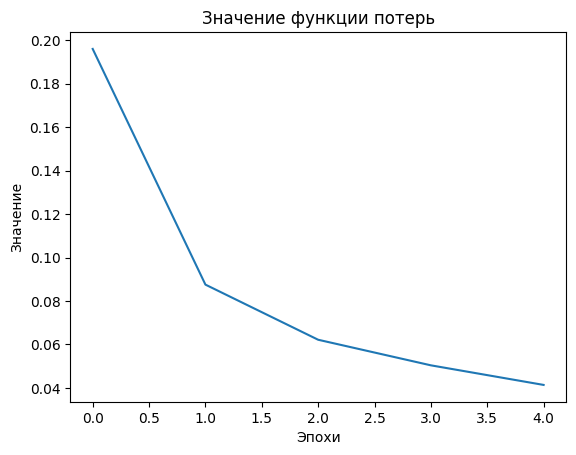

Обучение завершено!


In [14]:
# Визуализация обучения модели
plt.plot(all_losses)
plt.title('Значение функции потерь')
plt.xlabel('Эпохи')
plt.ylabel('Значение')
plt.show()
print('Обучение завершено!')

### Классификация с различными функциями активации:
Перепиши свою модель для использования функций активации Sigmoid, Tanh и Compare performance по метрикам (например, Precision, Recall, F1).

In [5]:
class SigmoidNN(nn.Module):
    """
    Нейросеть в которой в качестве функции активации используется только Sigmoid
    """
    def __init__(self, num_classes):
        super().__init__()
        
        # Входной слой
        self.input_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 512)
        )
        # Скрытые слои
        self.hidden_layers = nn.Sequential(
            nn.Linear(512, 512),
            nn.Sigmoid(),
            nn.Linear(512, 512),
            nn.Sigmoid()
        )
        # Выходной слой
        self.output_layer = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.input_layer(x)
        x = self.hidden_layers(x)
        logits = self.output_layer(x)

        return logits


In [6]:
class TanhNN(SigmoidNN):
    """
    Нейросеть в которой в качестве функции активации используется только Tanh
    """
    def __init__(self, num_classes):
        super().__init__(num_classes=num_classes)

        # Меняем функцию Sigmoid на Tanh
        self.hidden_layers[1], self.hidden_layers[3] = nn.Tanh(), nn.Tanh()


In [7]:
# Класс обучения нейросети
def train_nn(
    model: nn.Module,
    train_loader: DataLoader,
    test_loader: DataLoader,
    optimizer: torch.optim,
    criterion: nn.Module,
    num_epochs: int = 5,
    device: str = "cuda",
):
    # Загружаем модель на CUDA (GPU)
    model.to(device)
    
    # Переводим модель в режим обучения
    model.train()

    all_losses = []
    all_predicts = []
    all_targets = []
    # Списки для хранения метрик
    precisions = []
    recalls = []
    f1_s = []

    for epoch in range(num_epochs):
        total_loss = 0
        for data, targets in train_loader:
            # Перенос данных на CUDA (GPU)
            data, targets = data.to(device), targets.to(device)
            
            # Обнуление градиентов
            optimizer.zero_grad()

            outputs = model(data) # Прямое распространение
            loss = criterion(outputs, targets) # Расчет ошибки (функции потерь)

            total_loss += loss.item() # Увеличение общей ошибки на итерации
            all_predicts.extend(outputs.argmax(dim=1).cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
            
            loss.backward() # Обратное распространение
            optimizer.step() # Оптимизатор обновляет веса согласно полученным значением градиентов

        avg_loss = total_loss / len(train_loader)
        all_losses.append(avg_loss)
        # Расчет метрик
        precision = precision_score(all_targets, all_predicts, average="macro")
        recall = recall_score(all_targets, all_predicts, average="macro")
        f1 = f1_score(all_targets, all_predicts, average="macro")

        precisions.append(precision)
        recalls.append(recall)
        f1_s.append(f1)

        print(f"Epoch: {epoch + 1}/{num_epochs}. Loss: {avg_loss:.3f}. Pr: {precision:.2f}, R: {recall:.2f}, F1: {f1:.2f}")



    return {"losses": all_losses, "precisions": precisions, "recalls": recalls, "f1_s": f1_s}
    

In [ ]:
def plot_train_results(results: Dict):
    losses = results["losses"]

    plt.figure(figsize=(6, 6))
    plt.plot(losses)
    plt.title('Значение функции потерь')
    plt.xlabel('Эпохи')
    plt.ylabel('Значение')


In [34]:
def plot_metrics(results: Dict, num_epochs: int):
    """
    Функция для построения графиков метрик: Precision, Recall и F1 по эпохам.
    
    :param results: Словарь с метриками.
    :param num_epochs: Число эпох.
    """
    # Создание фигуры с тремя подграфиками
    figure, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Метрики
    precisions = results["precisions"]
    recalls = results["recalls"]
    f1_scores = results["f1_s"]

    # Эпохи
    epochs = range(1, num_epochs + 1)

    # Построение графиков
    metrics = [precisions, recalls, f1_scores]
    labels = ['Precision', 'Recall', 'F1 Score']
    colors = ['blue', 'orange', 'green']

    for ax, metric, label, color in zip(axes, metrics, labels, colors):
        # Вариант - Прямая линия
        # ax.plot(epochs, metric, marker='o', label=label, color=color)
        # Вариант - Столбчатая диаграмма
        ax.bar(epochs, metric, label=label, color=color, width=0.2, align='center')
        for i, v in enumerate(metric):
            ax.text(epochs[i], v + 0.02, str(round(v, 3)), ha='center', color='black')
        ax.set_xlabel('Эпохи')
        ax.set_ylabel('Значение метрики')
        ax.set_ylim(0, 1)  # Задаем диапазон оси Y от 0 до 1
        ax.set_xticks(epochs)  # Установка меток по оси X
        ax.grid()
    
    # Общая легенда для всех графиков
    figure.legend(labels, loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, 1.1))

    # Общий заголовок для всех графиков
    plt.suptitle('Precision, Recall и F1 Score по эпохам', fontsize=16)

    # Показать график
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Убрать проблемы с нахождением заголовка.
    plt.show()

In [8]:
# Обучение модели с Sigmoid
print("Обучение модели SigmoidNN:\n")
sigm_model = SigmoidNN(10)
sigm_optimizer = torch.optim.Adam(sigm_model.parameters())
sigm_criterion = nn.CrossEntropyLoss()
sigm_results = train_nn(
    sigm_model,
    train_dataloader,
    test_dataloader,
    sigm_optimizer,
    sigm_criterion
)


print("=" * 100 + "\n")
print("Обучение модели TanhNN:\n")
# Обучение модели с Tanh
tanh_model = TanhNN(10)
tanh_optimizer = torch.optim.Adam(tanh_model.parameters())
tanh_criterion = nn.CrossEntropyLoss()
tanh_results = train_nn(
    tanh_model,
    train_dataloader,
    test_dataloader,
    tanh_optimizer,
    tanh_criterion
)


Обучение модели SigmoidNN:

Epoch: 1/5. Loss: 0.318. Pr: 0.90, R: 0.90, F1: 0.90
Epoch: 2/5. Loss: 0.172. Pr: 0.92, R: 0.92, F1: 0.92
Epoch: 3/5. Loss: 0.137. Pr: 0.93, R: 0.93, F1: 0.93
Epoch: 4/5. Loss: 0.119. Pr: 0.94, R: 0.94, F1: 0.94
Epoch: 5/5. Loss: 0.105. Pr: 0.95, R: 0.95, F1: 0.95

Обучение модели TanhNN:

Epoch: 1/5. Loss: 0.308. Pr: 0.91, R: 0.91, F1: 0.91
Epoch: 2/5. Loss: 0.195. Pr: 0.92, R: 0.92, F1: 0.92
Epoch: 3/5. Loss: 0.171. Pr: 0.93, R: 0.93, F1: 0.93
Epoch: 4/5. Loss: 0.158. Pr: 0.94, R: 0.94, F1: 0.94
Epoch: 5/5. Loss: 0.152. Pr: 0.94, R: 0.94, F1: 0.94


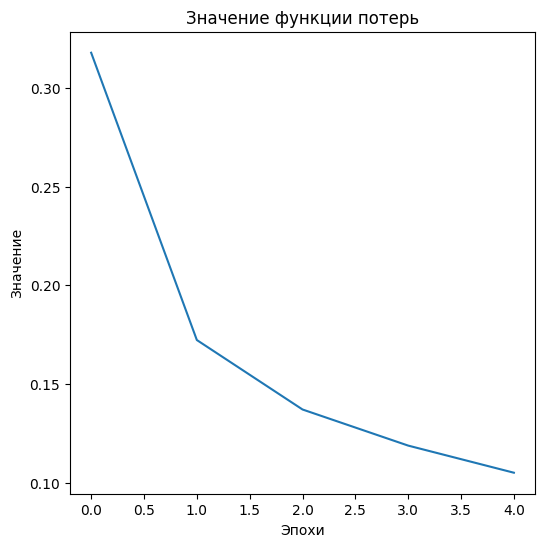

In [16]:
# Визуализация результатов SigmoidNN
plot_train_results(sigm_results)

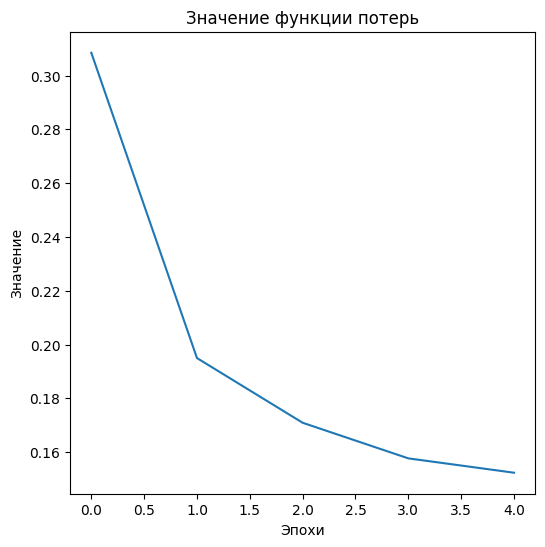

In [17]:
# Визуализация результатов SigmoidNN
plot_train_results(tanh_results)

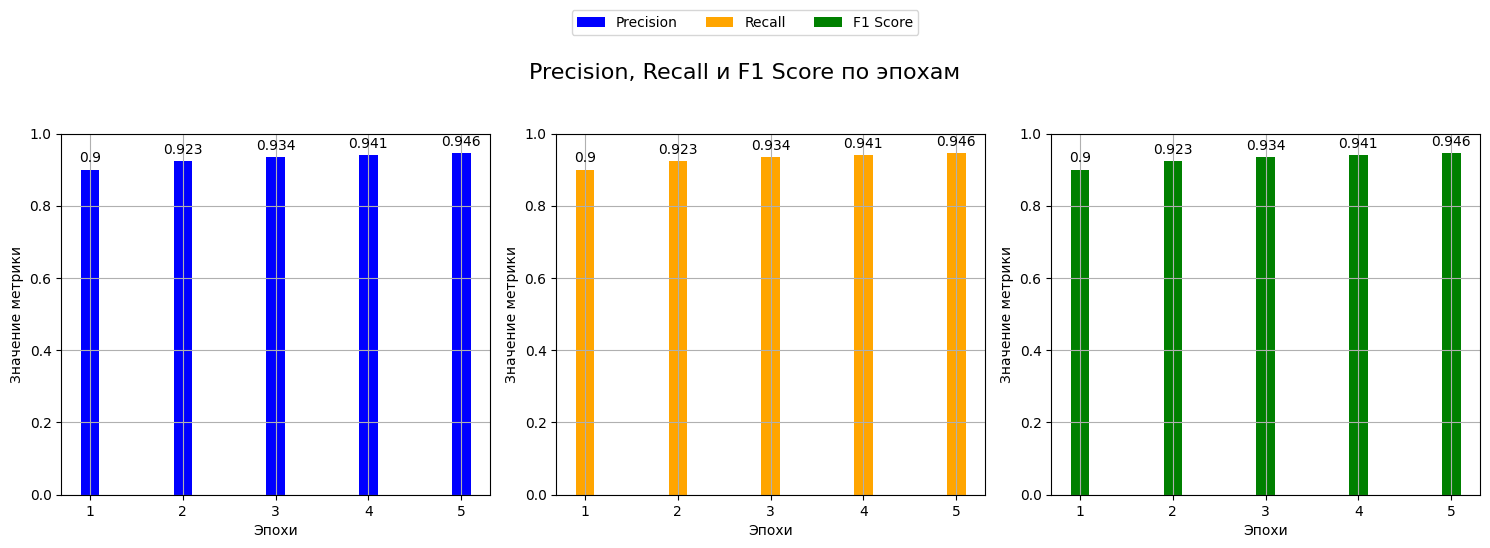

In [35]:
# Метрики SigmoidNN
plot_metrics(sigm_results, 5)

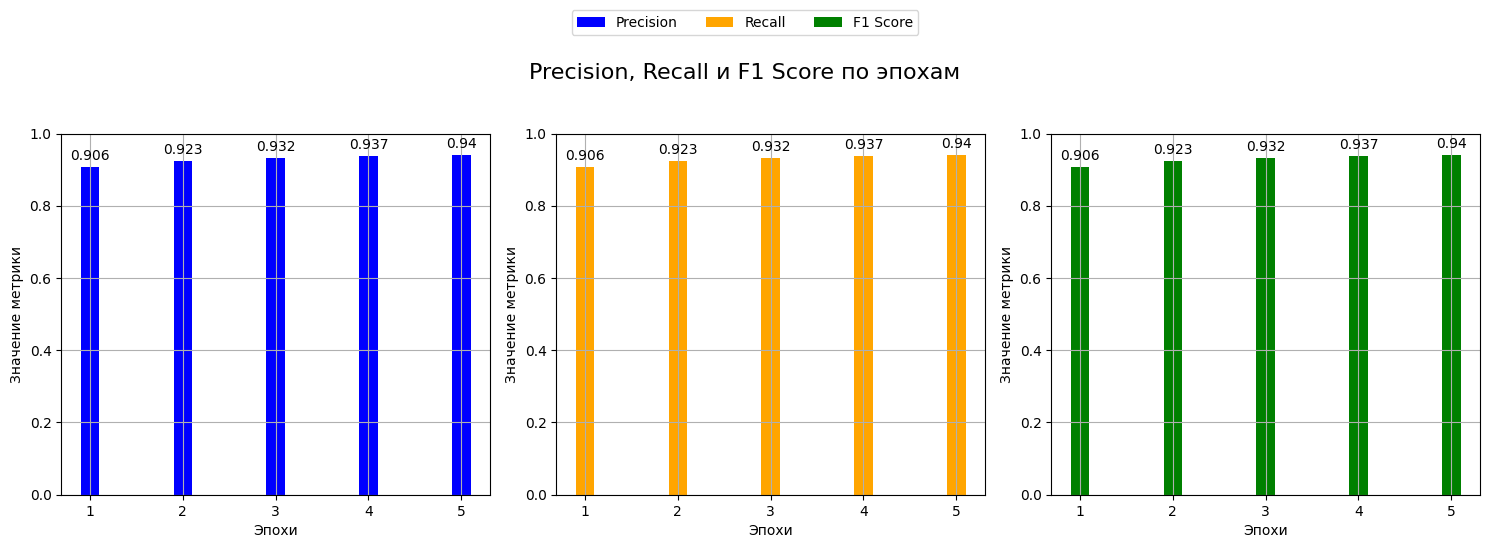

In [36]:
# Метрики SigmoidNN
plot_metrics(tanh_results, 5)

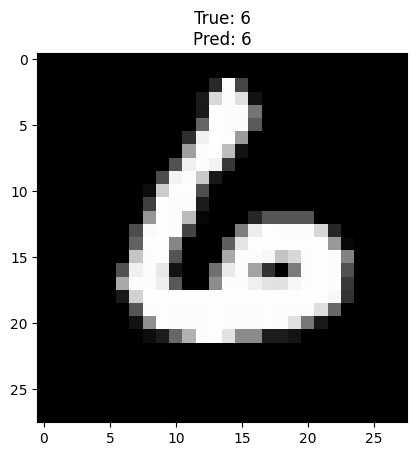

In [41]:
# Пример работы нейросети
sigm_model.eval()

test_features, test_labels = next(iter(test_dataloader))
img = test_features[0].squeeze()
true_label = test_labels[0]
pred_label = sigm_model(test_features[0]).argmax().numpy()
plt.title(f"True: {true_label}\nPred: {pred_label}")
plt.imshow(img, cmap="gray")
plt.show()

### Добавление слоев:
Увеличь количество скрытых слоев в своей модели до трех и экспериментируй с количеством нейронов в них. Проанализируй, как это влияет на производительность.

In [48]:
sigm_model.hidden_layers

Sequential(
  (0): Linear(in_features=512, out_features=512, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): Sigmoid()
)

In [68]:
# Увеличение кол-ва скрытых слоев для SigmoidNN
class NewSigmoidNN(SigmoidNN):
    def __init__(self, num_classes, input_features, output_features):
        super().__init__(num_classes)
        self.hidden_layers.extend(
            [
                nn.Linear(input_features, output_features),
                nn.ReLU(),
                nn.Linear(output_features, output_features),
                nn.ReLU()
            ]
        )
        self.output_layer = nn.Linear(output_features, num_classes)
    

In [69]:
newsigm_model = NewSigmoidNN(10, 512, 256)

newsigm_model_results = train_nn(
    newsigm_model,
    train_dataloader,
    test_dataloader,
    torch.optim.Adam(newsigm_model.parameters()),
    nn.CrossEntropyLoss()
)


Epoch: 1/5. Loss: 0.431. Pr: 0.86, R: 0.86, F1: 0.86
Epoch: 2/5. Loss: 0.208. Pr: 0.90, R: 0.90, F1: 0.90
Epoch: 3/5. Loss: 0.169. Pr: 0.92, R: 0.92, F1: 0.92
Epoch: 4/5. Loss: 0.148. Pr: 0.93, R: 0.93, F1: 0.93
Epoch: 5/5. Loss: 0.132. Pr: 0.93, R: 0.93, F1: 0.93


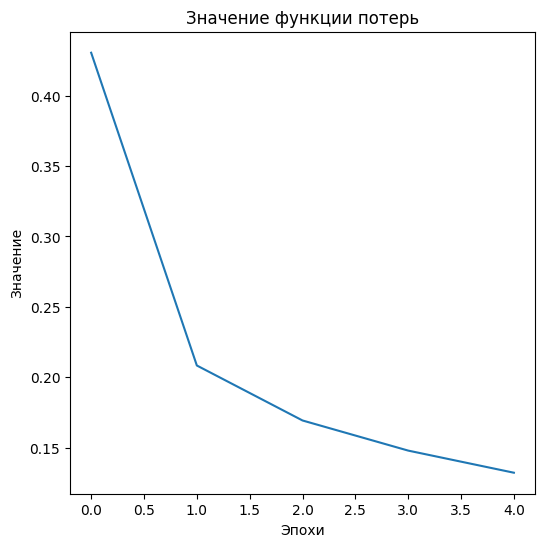

In [71]:
plot_train_results(newsigm_model_results)

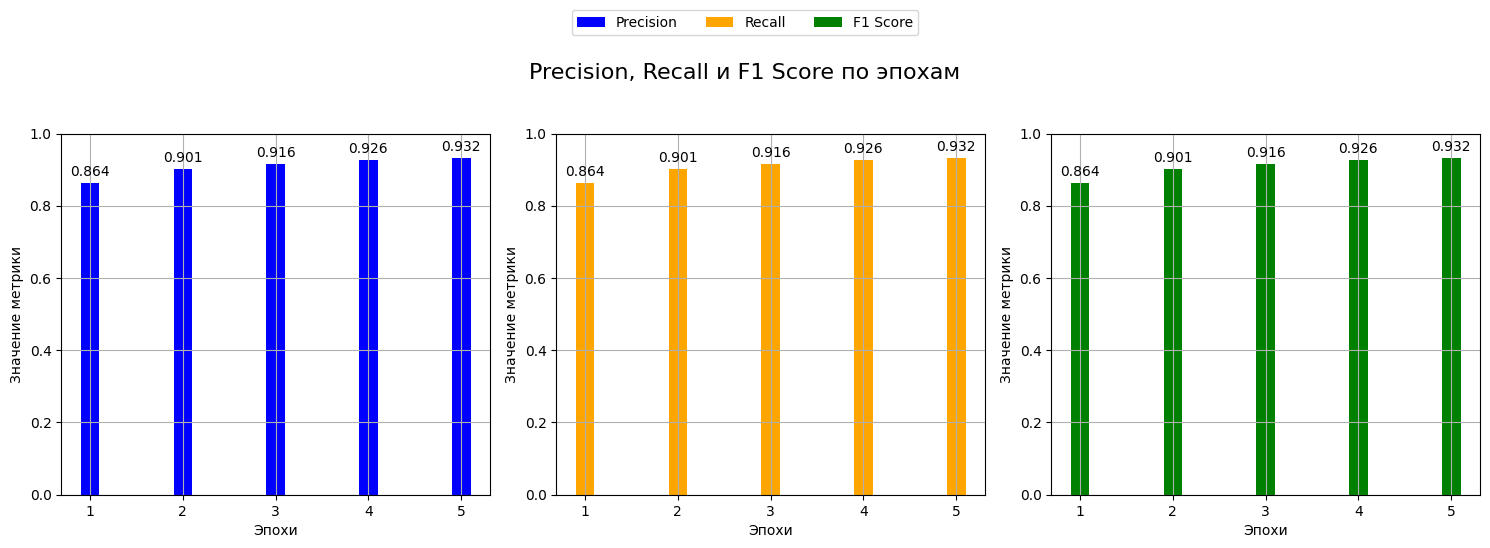

In [70]:
# Метрики NewSigmoidNN
plot_metrics(newsigm_model_results, 5)

### Обучение с использованием SGD:
Создай свою модель и обучи ее, используя стохастический градиентный спуск (SGD). Сравни точность модели по сравнению с применением Adam в качестве оптимизатора.

In [73]:
# Обучение модели. В качестве оптимизатора - SGD (стохастический градиентный спуск)
newsigm_model = NewSigmoidNN(10, 512, 256)

print("Обучение модели NewSigmoidNN с SGD оптимизатором:\n")
newsigm_model_results = train_nn(
    newsigm_model,
    train_dataloader,
    test_dataloader,
    torch.optim.SGD(newsigm_model.parameters(), lr=0.01),
    nn.CrossEntropyLoss()
)

Обучение модели NewSigmoidNN с SGD оптимизатором:



d:\Programming\Coursers_of_programming_2024\Pytorch-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch: 1/5. Loss: 2.302. Pr: 0.07, R: 0.10, F1: 0.05


d:\Programming\Coursers_of_programming_2024\Pytorch-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch: 2/5. Loss: 2.301. Pr: 0.07, R: 0.10, F1: 0.04


d:\Programming\Coursers_of_programming_2024\Pytorch-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch: 3/5. Loss: 2.301. Pr: 0.10, R: 0.10, F1: 0.04
Epoch: 4/5. Loss: 2.299. Pr: 0.11, R: 0.10, F1: 0.04
Epoch: 5/5. Loss: 2.230. Pr: 0.13, R: 0.11, F1: 0.06


По результатам видно, что модель не может перескачить локальный минимум. Для этого попробуем убрать все Сигмоид функции активации из архитектуры модели, напишем класс ReLUNN с наследованием основной части архитектуры от класса NewSigmoidNN

In [76]:
# Заменю функцию активации Sigmoid на ReLU
class ReLUNN(NewSigmoidNN):
    def __init__(self, num_classes, input_features, output_features):
        super().__init__(num_classes, input_features, output_features)

        self.hidden_layers[1] = nn.ReLU()
        self.hidden_layers[3] = nn.ReLU()
        

In [78]:
# Обучение модели. В качестве оптимизатора - SGD (стохастический градиентный спуск)
relu_model = ReLUNN(10, 512, 256)

print("Обучение модели ReLUNN с SGD оптимизатором:\n")
relu_model_results = train_nn(
    relu_model,
    train_dataloader,
    test_dataloader,
    torch.optim.SGD(relu_model.parameters(), lr=0.01),
    nn.CrossEntropyLoss()
)

Обучение модели ReLUNN с SGD оптимизатором:

Epoch: 1/5. Loss: 1.643. Pr: 0.61, R: 0.42, F1: 0.44
Epoch: 2/5. Loss: 0.397. Pr: 0.75, R: 0.65, F1: 0.67
Epoch: 3/5. Loss: 0.248. Pr: 0.80, R: 0.74, F1: 0.76
Epoch: 4/5. Loss: 0.171. Pr: 0.83, R: 0.79, F1: 0.80
Epoch: 5/5. Loss: 0.130. Pr: 0.86, R: 0.83, F1: 0.84


В результате при замене всех Сигмоид функций активации на ReLU модель стала обучаться и даже достигла неплохих результатов, но по сравнению с Adam в качестве оптимизатора результаты стали значительно хуже.

### Регуляризация:
Реализуй технику регуляризации Dropout в своей нейронной сети и сравни результаты с полученными ранее.

In [ ]:
# Модель с Dropout в качестве регуляризации в архитектуре


### Датасет CIFAR-10:
Загрузите и предобработайте датасет CIFAR-10, реализуй нейронную сеть, используя архитектуру с несколькими слоями.

### Переобучение:
Намеренно создай переобученную модель, используя небольшое количество эпох для обучения, а затем продемонстрируй, как использовать валидационный набор для уменьшения переобучения.